In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math
import sklearn.preprocessing

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 
import pandas as pd


In [3]:
X , y = datasets.load_wine(return_X_y=True)

In [4]:
print(X.shape)
print(y.shape)
input_dim = X.shape[1]
print(input_dim)

(178, 13)
(178,)
13


In [5]:
y[y==1] = 0
y[y==2] = 1

In [6]:
x_train = np.array(X)
y_train = np.array(y.reshape(-1,1))

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_train


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Bloom Filter

In [8]:
class BloomFilter:
    
    def __init__(self, size, model): #hash count is 1
        self.size = size
      #  self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.model=model #classifier model associated as hash function
        
    def add(self, num):
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        self.bit_array[result] = 1
            
    def lookup(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(self.model.predict(num)[0]*(self.size-1))    
        if self.bit_array[result] == 0:
                return False
        return True

    def add_init(self,x_train,y_train):
        pred = self.model.predict_proba(x_train)
        pred=pred[:,1]
        pred=pred.reshape(-1,1)
        for i in range(len(pred)):
            if(y_train[i]==1):
                result = math.floor(pred[i][0]*(self.size-1))
                self.bit_array[result] = 1
    
    def predict(self,x):
        initpred = self.model.predict_proba(x)
        initpred=initpred[:,1]
        initpred=initpred.reshape(-1,1)
        indexes = []
        for i in range(len(initpred)):
            indexes += [math.floor(initpred[i][0]*(bf.size-1))]
        pred = []
        for i in indexes:
            pred += [self.bit_array[i]]
        return np.array(pred)

#(Input:bloom filter,number array,ratio; Output:(-1) for false negative, otherwise fpr)
def fpr_kraska_hash(bf,x,y):
    pred = bf.predict(x)
    pred=pred.reshape(-1,1)
    tn, fp, fn, tp = confusion_matrix(y, pred,labels=[False,True]).ravel() 
    return fp/(fp+tn)

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k


def fpr_test(x,bf,y):
    pred=bf.predict(x)
    fp=0
    tn=0
    for i in range(len(pred)):
        if((pred[i]==1)and(y[i]==0)):
            fp+=1
        if((pred[i]==0) and (y[i]==0)):
            tn+=1
        if((pred[i]==0) and (y[i]==1)):
            return -1
    print(fp)
    print(tn)
    return fp/(fp+tn)
def outputs(m,n,r):
    find_fpr(m,model,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

# Logistic Regression Model

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=10.0,random_state = 10,max_iter=100)
classifier.fit(x_train, y_train)

/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_pred = classifier.predict(x_train)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [11]:
prob=classifier.predict_proba(x_train)
print(prob[:,1])

[2.91520930e-06 2.47586003e-06 1.03732373e-05 5.04396936e-04
 4.65687818e-04 1.70269290e-04 1.07099144e-04 7.31761861e-04
 2.98771666e-05 1.73932402e-05 2.20658355e-06 2.60270935e-04
 8.39821783e-05 3.85989846e-07 2.75660846e-06 7.48147777e-04
 2.68585341e-03 3.31491471e-04 8.12496084e-05 1.32580607e-04
 8.77534164e-07 8.02132243e-05 4.54500304e-07 1.00053667e-05
 3.70866944e-06 2.12241620e-04 2.11528870e-04 2.19577400e-04
 9.91284357e-06 1.20821483e-05 5.72795009e-05 1.40781705e-04
 3.44729045e-06 2.08315025e-04 4.55776617e-04 8.58483436e-06
 6.40289423e-04 4.71684166e-04 3.60791961e-06 1.20115811e-04
 2.73145628e-06 1.90898430e-04 3.42869616e-05 3.82277185e-04
 2.36835975e-06 7.68387488e-03 7.23836748e-06 4.62123340e-06
 1.50892575e-04 4.07260583e-05 4.26367799e-07 6.22500792e-06
 1.03947983e-05 9.92452252e-04 1.50098169e-04 2.14557270e-04
 7.71149226e-05 2.34501763e-04 1.91715648e-04 2.34420508e-04
 4.96044728e-03 7.47642181e-02 1.22540042e-04 5.37151193e-08
 1.95138626e-05 1.289528

In [12]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_train, y_pred))

Accuracy :  1.0


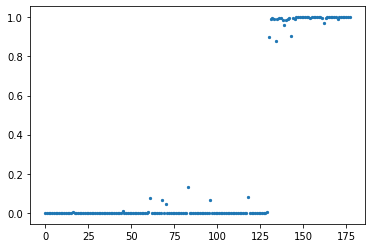

In [13]:
preds =prob[:,1]
plt.scatter(np.arange(len(preds)), preds, s=5)

In [20]:
m=10

In [21]:
bf=BloomFilter(m,classifier)

In [22]:
bf.add_init(x_train,y_train)

In [23]:
print(fpr_test(x_train,bf,y_train))

0
130
0.0


In [24]:
import pickle
import os

In [40]:
filename1='logreg_wine.sav'
pickle.dump(classifier,open(filename1,'wb'))

In [41]:
model_size1=os.stat('logreg_wine.sav').st_size

In [42]:
print(model_size1)

928


# SVM Model

In [28]:
from sklearn import svm
from sklearn.metrics import accuracy_score 


In [29]:
clf2 = svm.SVC(kernel='rbf',probability=True)
clf2.fit(x_train, y_train)

/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [30]:
predic=clf2.predict(x_train)

In [31]:
probability=clf2.predict_proba(x_train)
print(probability[:,1])
print(probability.shape)

[5.90829130e-03 4.58203667e-03 5.71706065e-03 1.08771022e-02
 6.74260766e-03 5.83885864e-03 6.20363211e-03 5.63522728e-03
 5.69585755e-03 5.76019432e-03 5.36439286e-03 6.23759487e-03
 4.90456865e-03 1.08718706e-02 1.08463831e-02 7.77232727e-03
 1.08769174e-02 8.05328075e-03 1.08677720e-02 5.62547690e-03
 5.29654628e-03 3.75572657e-03 2.13099178e-03 2.10058549e-03
 1.88611677e-03 1.08584648e-02 4.96576988e-03 4.81125677e-03
 3.46953435e-03 3.49017026e-03 9.44730346e-03 7.06434971e-03
 1.44069287e-03 8.34554130e-03 3.89287319e-03 2.08590555e-03
 5.93858444e-03 4.14852616e-03 1.54341300e-03 1.08778801e-02
 4.80842295e-03 5.30646880e-03 6.33353081e-03 6.87685267e-03
 2.78087795e-03 1.08632877e-02 3.82943353e-03 5.05391035e-03
 6.33241226e-03 7.86165833e-03 1.08712657e-02 5.58881473e-03
 6.85058023e-03 6.46822477e-03 6.14579885e-03 7.70798301e-03
 5.74963603e-03 5.09062539e-03 8.69673034e-03 1.08471604e-02
 6.54394202e-03 4.09419172e-02 2.73727251e-03 6.19686444e-03
 2.03590305e-03 2.565195

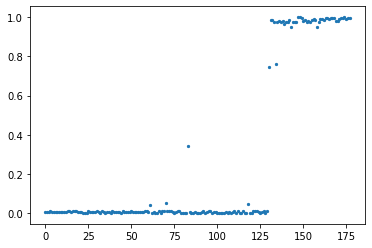

In [32]:
prob=probability[:,1]
plt.scatter(np.arange(len(prob)), prob, s=5)

In [33]:
accuracy = accuracy_score(y_train.flatten(),predic)
print(accuracy)

1.0


In [34]:
m=25
bf=BloomFilter(m,clf2)
bf.add_init(x_train,y_train)

In [35]:
print(fpr_test(x_train,bf,y_train))

0
130
0.0


In [36]:
preds

array([2.91520930e-06, 2.47586003e-06, 1.03732373e-05, 5.04396936e-04,
       4.65687818e-04, 1.70269290e-04, 1.07099144e-04, 7.31761861e-04,
       2.98771666e-05, 1.73932402e-05, 2.20658355e-06, 2.60270935e-04,
       8.39821783e-05, 3.85989846e-07, 2.75660846e-06, 7.48147777e-04,
       2.68585341e-03, 3.31491471e-04, 8.12496084e-05, 1.32580607e-04,
       8.77534164e-07, 8.02132243e-05, 4.54500304e-07, 1.00053667e-05,
       3.70866944e-06, 2.12241620e-04, 2.11528870e-04, 2.19577400e-04,
       9.91284357e-06, 1.20821483e-05, 5.72795009e-05, 1.40781705e-04,
       3.44729045e-06, 2.08315025e-04, 4.55776617e-04, 8.58483436e-06,
       6.40289423e-04, 4.71684166e-04, 3.60791961e-06, 1.20115811e-04,
       2.73145628e-06, 1.90898430e-04, 3.42869616e-05, 3.82277185e-04,
       2.36835975e-06, 7.68387488e-03, 7.23836748e-06, 4.62123340e-06,
       1.50892575e-04, 4.07260583e-05, 4.26367799e-07, 6.22500792e-06,
       1.03947983e-05, 9.92452252e-04, 1.50098169e-04, 2.14557270e-04,
      

In [43]:
filename2='svm_wine.sav'
pickle.dump(clf2,open(filename2,'wb'))

In [44]:
model_size2=os.stat('svm_wine.sav').st_size

In [45]:
print(model_size2)

6870
